In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.remove('/global/homes/d/dorislee/.local/lib/python2.7/site-packages/yt-3.2.dev0-py2.7-linux-x86_64.egg')
sys.path.remove('/global/homes/d/dorislee/.local/lib/python2.7/site-packages')
sys.path.append('/global/homes/d/dorislee/mypythonpackages')

# For  SMR

In [103]:
cd ~/gscratch/athena_smr/smr/

/global/scratch2/sd/dorislee/athena_smr/smr


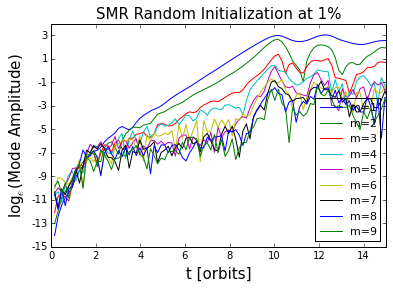

In [104]:
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.ticker as mtick
fig, ax = plt.subplots()
amp =  np.loadtxt("amp.txt")
t_orbits  = np.arange(len(amp))/2./np.pi
plt.ylabel("log$_e$(Mode Amplitude)",fontsize=15)
plt.xlabel("t [orbits]",fontsize=15)
for m in np.arange(1,10):
    plt.semilogy(t_orbits,amp[:,m],label="m={}".format(m),basey=np.e)
x_min=5
x_max=10
# plt.axvline(x_min,color='r',linestyle="--")
# plt.axvline(x_max,color='r',linestyle="--")
plt.xlim(0,15)
plt.title("SMR Random Initialization at 1%",fontsize=15)
plt.legend(loc='lower right',prop={'size':11},numpoints=1)
def ticks(y, pos):
    return r'{:.0f}'.format(np.log(y))
ax.yaxis.set_major_formatter(mtick.FuncFormatter(ticks))
# plt.savefig("randinit1percent.pdf",format="pdf")

#### Computing Mode Growth

In [66]:
def compute_mode_growth_by_ls_fit(m,start,end):
    x = t_orbits[start:end]
    y=log(amp[start:end,m])
    A = np.vstack([x, np.ones(len(x))]).T
    plt.plot(x,y,label="m=1")#,basey=np.e)
    m, c = np.linalg.lstsq(A, y)[0]
    print m, c
    x_fit = np.linspace(t_orbits[start],t_orbits[end])
    y_fit = m*x_fit+c
    plt.plot(x_fit,y_fit,'--',color='red')
    print "Growth Rate is: ",1./m

In [67]:
def compute_mode_growth(m,x_min,x_max):
    y_min = amp[x_min,:][m]
    y_max = amp[x_max,:][m]
    print "For Mode m=",m
    e_folding_time = (x_max-x_min)/log(y_max/y_min)
    print "Growth rate: ",e_folding_time/2./pi ,"orbital time"

Computing m=1 mode growth

1.22188881367 -9.00698882125
Growth Rate is:  0.818405069929
For Mode m= 1
Growth rate:  0.843601453457 orbital time


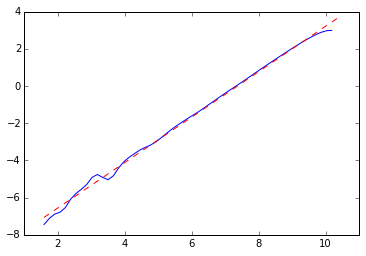

In [68]:
compute_mode_growth_by_ls_fit(1,10,65)
compute_mode_growth(1,10,65)

1.2049012268 -9.77491384396
Growth Rate is:  0.829943548696
For Mode m= 2
Growth rate:  0.941482239747 orbital time


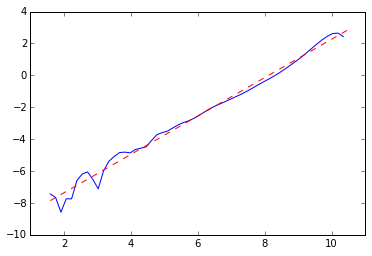

In [74]:
m=2
a = 10
b = 66
compute_mode_growth_by_ls_fit(m,a,b)
compute_mode_growth(m,a,b)

0.870888752363 -9.01034745149
Growth Rate is:  1.14825228514
For Mode m= 3
Growth rate:  1.04857004459 orbital time


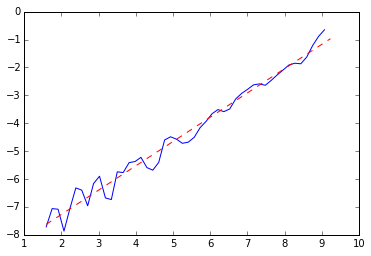

In [75]:
m=3
a = 10
b = 58
compute_mode_growth_by_ls_fit(m,a,b)
compute_mode_growth(m,a,b)

# For Uniform PPI

In [49]:
cd ~/gscratch/athena_smr/uniform_compare/

/global/scratch2/sd/dorislee/athena_smr/uniform_compare


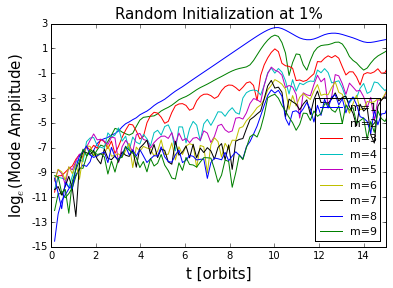

In [50]:
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.ticker as mtick
fig, ax = plt.subplots()
amp =  np.loadtxt("amp.txt")
t_orbits  = np.arange(len(amp))/2./np.pi
plt.ylabel("log$_e$(Mode Amplitude)",fontsize=15)
plt.xlabel("t [orbits]",fontsize=15)
for m in np.arange(1,10):
    plt.semilogy(t_orbits,amp[:,m],label="m={}".format(m),basey=np.e)
x_min=5
x_max=10
# plt.axvline(x_min,color='r',linestyle="--")
# plt.axvline(x_max,color='r',linestyle="--")
plt.xlim(0,15)
plt.title("Random Initialization at 1%",fontsize=15)
plt.legend(loc='lower right',prop={'size':11},numpoints=1)
def ticks(y, pos):
    return r'{:.0f}'.format(np.log(y))
ax.yaxis.set_major_formatter(mtick.FuncFormatter(ticks))
# plt.savefig("randinit1percent.pdf",format="pdf")

1.2334459892 -9.4020902056
Growth Rate is:  0.810736756012
For Mode m= 1
Growth rate:  0.787565666385 orbital time


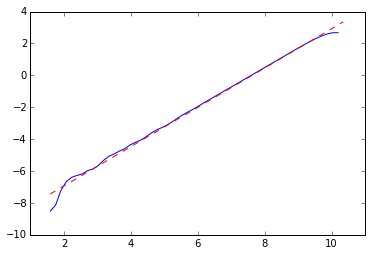

In [53]:
a = 10
b = 65
compute_mode_growth_by_ls_fit(1,a,b)
compute_mode_growth(1,a,b)

1.01424524004 -9.06800161805
Growth Rate is:  0.985954836685
For Mode m= 2
Growth rate:  0.931518741547 orbital time


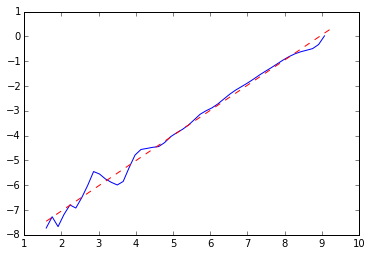

In [57]:
m=2
a = 10
b = 58
compute_mode_growth_by_ls_fit(m,a,b)
compute_mode_growth(m,a,b)

0.617004554633 -7.77292150718
Growth Rate is:  1.62073357885
For Mode m= 3
Growth rate:  1.76119053444 orbital time


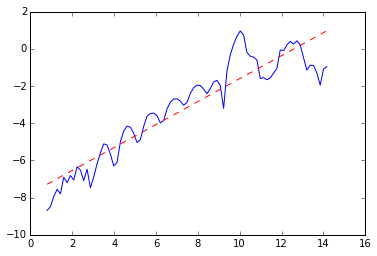

In [63]:
m=3
a = 5
b = 90
compute_mode_growth_by_ls_fit(m,a,b)
compute_mode_growth(m,a,b)

# For MRI

In [9]:
cd ~/gscratch/athena_2/mri_resolved/

/global/scratch2/sd/dorislee/athena_2/mri_resolved


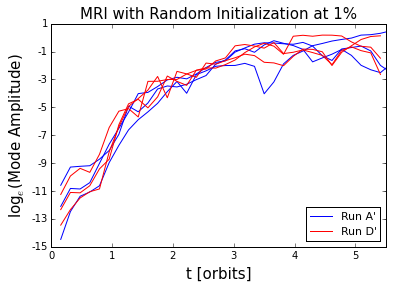

In [10]:
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.ticker as mtick
import matplotlib as mpl
# mpl.rcParams['axes.color_cycle'] = ['cyan', 'g', 'r', 'c', 'm','gold',  'b','deeppink','navy']
fig, ax = plt.subplots()

# mpl.rcParams['axes.color_cycle'] = ['b', 'g', 'r', 'c', 'm']
# fig, ax = plt.subplots()
amp =  np.loadtxt("../mri_hi_res/amp.txt")
t_orbits  = np.arange(len(amp))/2./np.pi
plt.ylabel("log$_e$(Mode Amplitude)",fontsize=15)
plt.xlabel("t [orbits]",fontsize=15)
# for m in np.arange(1,5):
plt.semilogy(t_orbits,amp[:,1],label="Run A' ",basey=np.e,color='blue')
plt.semilogy(t_orbits,amp[:,2],basey=np.e,color='blue')
plt.semilogy(t_orbits,amp[:,3],basey=np.e,color='blue')
# plt.semilogy(t_orbits,amp[:,4],basey=np.e,color='blue')
# plt.semilogy(t_orbits,amp[:,5],basey=np.e,color='blue')



amp =  np.loadtxt("../mri_resolved/amp.txt")
t_orbits  = np.arange(len(amp))/2./np.pi
plt.ylabel("log$_e$(Mode Amplitude)",fontsize=15)
plt.xlabel("t [orbits]",fontsize=15)

plt.semilogy(t_orbits,amp[:,1],label="Run D'",basey=np.e,color='red')
plt.semilogy(t_orbits,amp[:,2],basey=np.e,color='red')
plt.semilogy(t_orbits,amp[:,3],basey=np.e,color='red')
# plt.semilogy(t_orbits,amp[:,4],basey=np.e,color='red')
# plt.semilogy(t_orbits,amp[:,5],basey=np.e,color='red')
x_min=5
x_max=10
plt.title("MRI with Random Initialization at 1%",fontsize=15)
def ticks(y, pos):
    return r'{:.0f}'.format(np.log(y))
ax.yaxis.set_major_formatter(mtick.FuncFormatter(ticks))


plt.xlim(0,5.5)
plt.title("MRI with Random Initialization at 1%",fontsize=15)
plt.legend(loc='lower right',prop={'size':11},numpoints=1)
def ticks(y, pos):
    return r'{:.0f}'.format(np.log(y))
ax.yaxis.set_major_formatter(mtick.FuncFormatter(ticks))
plt.savefig("mri_randinit1percent_comp.pdf",format="pdf")

In [5]:
cd ~/gscratch/athena_2/mri_hi_res/

/global/scratch2/sd/dorislee/athena_2/mri_hi_res


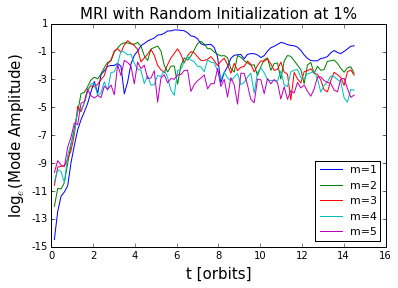

In [7]:
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.ticker as mtick
import matplotlib as mpl
mpl.rcParams['axes.color_cycle'] = ['b', 'g', 'r', 'c', 'm']
fig, ax = plt.subplots()
amp =  np.loadtxt("../mri_hi_res/amp.txt")
t_orbits  = np.arange(len(amp))/2./np.pi
plt.ylabel("log$_e$(Mode Amplitude)",fontsize=15)
plt.xlabel("t [orbits]",fontsize=15)
for m in np.arange(1,6):
    plt.semilogy(t_orbits,amp[:,m],label="m={}".format(m),basey=np.e)
x_min=5
x_max=10
# plt.axvline(x_min,color='r',linestyle="--")
# plt.axvline(x_max,color='r',linestyle="--")
# plt.xlim(0,15)
plt.title("MRI with Random Initialization at 1%",fontsize=15)
plt.legend(loc='lower right',prop={'size':11},numpoints=1)
def ticks(y, pos):
    return r'{:.0f}'.format(np.log(y))
ax.yaxis.set_major_formatter(mtick.FuncFormatter(ticks))
plt.savefig("mri_randinit1percent.pdf",format="pdf")

7.86498364436 -15.590399183
Growth Rate is:  0.127145846097
For Mode m= 1
Growth rate:  0.148578285198 orbital time


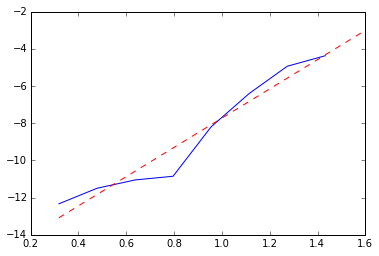

In [89]:
m=1
a = 2
b = 10
compute_mode_growth_by_ls_fit(m,a,b)
compute_mode_growth(m,a,b)

3.65745947203 -11.3550811741
Growth Rate is:  0.273413829367
For Mode m= 2
Growth rate:  0.269179030102 orbital time


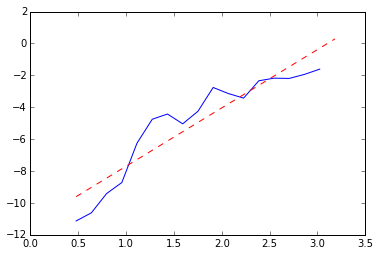

In [90]:
m=2
a = 3
b = 20
compute_mode_growth_by_ls_fit(m,a,b)
compute_mode_growth(m,a,b)

2.71621515402 -9.37929758417
Growth Rate is:  0.368159347952
For Mode m= 3
Growth rate:  0.412751848408 orbital time


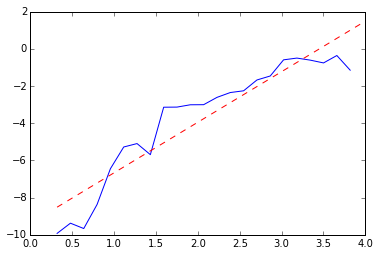

In [98]:
m=3
a = 2
b = 25
compute_mode_growth_by_ls_fit(m,a,b)
compute_mode_growth(m,a,b)

# Compute Mass accretion rate history 

In [180]:
cd ~/gscratch/athena_smr/smr/

/global/scratch2/sd/dorislee/athena_smr/smr


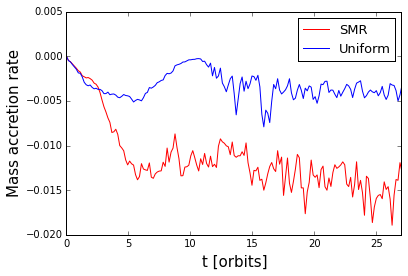

In [182]:
from matplotlib.legend_handler import HandlerLine2D
mdot_smr = np.loadtxt("../smr/mdot.txt")
mdot_ppi = np.loadtxt("../uniform_compare/mdot.txt")
mdot_mri = np.loadtxt("../../athena_2/mri_resolved/mdot.txt")
t_orbits_smr  = np.arange(len(mdot_smr))/2./np.pi
t_orbits_ppi  = np.arange(len(mdot_ppi))/2./np.pi
t_orbits_mri  = np.arange(len(mdot_mri))/2./np.pi
plt.plot(t_orbits_smr,mdot_smr,label = "SMR",color="red")
plt.plot(t_orbits_ppi,mdot_ppi,label="Uniform")
plt.ylabel("Mass accretion rate",fontsize=15)
plt.xlabel("t [orbits]",fontsize=15)
plt.xlim(0,27)
plt.legend(loc='upper right',prop={'size':13},numpoints=1)
plt.savefig("mass_accretion_smr.pdf",fmt="pdf")

This agrees with PPI in that there is not a lot of accretion happening

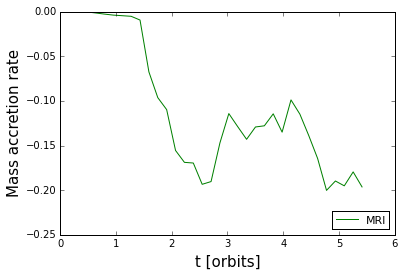

In [118]:
plt.plot(t_orbits_mri,mdot_mri,label="MRI",color="green")
plt.ylabel("Mass accretion rate",fontsize=15)
plt.xlabel("t [orbits]",fontsize=15)
plt.legend(loc='lower right',prop={'size':11},numpoints=1)

# Overlay 

In [3]:
cd ~/gscratch/athena_smr/smr/

/global/scratch2/sd/dorislee/athena_smr/smr


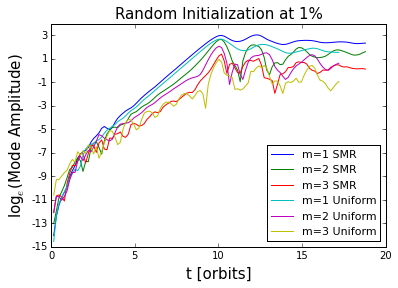

In [4]:
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.ticker as mtick
fig, ax = plt.subplots()
amp =  np.loadtxt("../smr/amp.txt")
t_orbits  = np.arange(len(amp))/2./np.pi
plt.ylabel("log$_e$(Mode Amplitude)",fontsize=15)
plt.xlabel("t [orbits]",fontsize=15)
for m in np.arange(1,4):
    plt.semilogy(t_orbits,amp[:,m],label="m={} SMR".format(m),basey=np.e)
#UNIFORM
amp =  np.loadtxt("../uniform_compare/amp.txt")
t_orbits  = np.arange(len(amp))/2./np.pi
plt.ylabel("log$_e$(Mode Amplitude)",fontsize=15)
plt.xlabel("t [orbits]",fontsize=15)
for m in np.arange(1,4):
    plt.semilogy(t_orbits,amp[:,m],label="m={} Uniform".format(m),basey=np.e)
plt.title("Random Initialization at 1%",fontsize=15)
plt.legend(loc='lower right',prop={'size':11},numpoints=1)
def ticks(y, pos):
    return r'{:.0f}'.format(np.log(y))
ax.yaxis.set_major_formatter(mtick.FuncFormatter(ticks))
plt.savefig("randinit1percent_smr.pdf",format="pdf")